In [1]:
from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import MinMaxScaler #for various scaling methods
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,0.0,1025,10,99,2016,3,0


In [4]:
df.shape

(155223, 19)

In [5]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month', 'Target'],
      dtype='object')

In [6]:
# Total no of duplicate rows
df.duplicated().sum()

79878

In [7]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [8]:
df.shape

(75345, 19)

## Feature Scaling

In [9]:
feature_scale = [feature for feature in df.columns if feature not in ['Target']]

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

data.head()

,Target,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
0,1,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.000000,0.602941,1.0,0.531429,0.333333,0.181818
1,0,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.000000,0.602941,1.0,0.531429,0.333333,0.181818
2,0,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.76,0.698113,0.285714,0.34,0.698925,0.000000,0.705882,1.0,0.274286,0.333333,0.181818
3,1,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.76,0.698113,0.285714,0.34,0.698925,0.000000,0.705882,1.0,0.274286,0.333333,0.181818
4,0,0.505636,0.196981,0.742734,0.611940,0.731343,0.0,0.432258,0.26,0.792453,0.175824,0.61,0.763441,0.097011,0.558824,0.8,0.291429,0.333333,0.272727


# Train Test split

In [10]:
X = data.drop('Target',axis=1)
y = data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=10) #train test split in 50:50 ratio

In [11]:
X_train.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
18866,0.000897,0.596817,0.573923,0.656716,0.656716,0.0,0.625806,0.11,0.830189,0.054945,0.40,0.892473,0.149179,0.514706,0.6,0.700000,0.333333,0.272727
39309,0.011305,0.643994,0.554194,0.537313,0.611940,0.0,0.625806,0.53,0.698113,0.109890,0.20,0.720430,0.002931,0.558824,1.0,0.400000,0.333333,0.636364
70300,0.324189,0.622078,0.490980,0.731343,0.835821,0.0,0.645161,0.56,0.943396,0.109890,0.37,0.774194,0.000879,0.500000,1.0,0.451429,0.666667,0.454545
49555,0.003224,0.551994,0.534216,0.567164,0.656716,0.0,0.625806,0.36,0.754717,0.076923,0.41,0.849462,0.107855,0.573529,0.8,0.697143,0.333333,0.909091
27057,0.001310,0.539316,0.526928,0.611940,0.761194,0.0,0.380645,0.48,0.905660,0.054945,0.75,0.978495,0.036928,0.573529,0.9,0.388571,0.333333,0.363636


# Naive Bayes

In [12]:
nbModel = GaussianNB()
nbModel.fit(X_train, y_train) 
nbModelpred = nbModel.predict(X_test)

print(confusion_matrix(y_test,nbModelpred))
print(accuracy_score(y_test,nbModelpred))
print(classification_report(y_test,nbModelpred))

[[ 9968 10341]
 [ 6317 11047]]
0.5578265601359064
              precision    recall  f1-score   support

           0       0.61      0.49      0.54     20309
           1       0.52      0.64      0.57     17364

    accuracy                           0.56     37673
   macro avg       0.56      0.56      0.56     37673
weighted avg       0.57      0.56      0.56     37673



In [13]:
from sklearn.metrics import precision_score
print(precision_score(y_test, nbModelpred), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, nbModelpred), ": is the recall score")

from sklearn.metrics import f1_score
print(f1_score(y_test, nbModelpred), ": is the f1 score")

0.5165045820086029 : is the precision score
0.6362013360976734 : is the recall score
0.5701383154417836 : is the f1 score


### K Fold Cross Validation

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold_validation=KFold(10)

model = GaussianNB() 
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print('Max :',np.max(results))
print('Min :',np.min(results))
print('Mean :',np.mean(results))

[0.58248175 0.54200398 0.5402787  0.54372926 0.54426012 0.54698699
 0.52933369 0.50650385 0.39235466 0.48221396]
Max : 0.5824817518248175
Min : 0.39235465887974513
Mean : 0.5210146966576119


### Stratified K-fold Cross Validation

In [15]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model = GaussianNB() 
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

0.4852190177367136


In [16]:
scores

array([0.51785003, 0.57876576, 0.53377571, 0.44021234, 0.52859987,
       0.54127953, 0.39009822, 0.40111495, 0.45288028, 0.46761349])

In [17]:
print('Max :',np.max(scores))
print('Min :',np.min(scores))
print('Mean :',np.mean(scores))

Max : 0.5787657597876577
Min : 0.3900982213963366
Mean : 0.4852190177367136


## Graphical Analysis

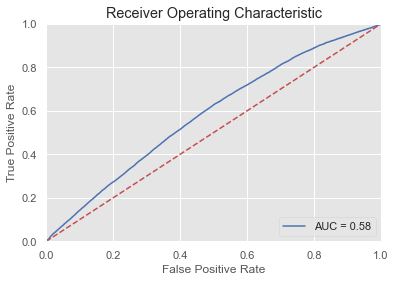

In [18]:
from sklearn.metrics import roc_curve, auc

probs               = nbModel.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Tuning the model using grid searchCV
- var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean.
- In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.

In [19]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

model = GaussianNB() 

# define models and parameters

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)  # Calculation Stability to Widen (or Smooth) the Curve
}

cv = KFold(n_splits=10)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid_nb, verbose=1,cv=cv, n_jobs=1)
grid_result = grid_search.fit(X_train, y_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best: 0.573901 using {'var_smoothing': 0.43287612810830584}
0.565831 (0.009507) with: {'var_smoothing': 1.0}
0.569680 (0.012063) with: {'var_smoothing': 0.8111308307896871}
0.571936 (0.010570) with: {'var_smoothing': 0.657933224657568}
0.572733 (0.007948) with: {'var_smoothing': 0.533669923120631}
0.573901 (0.007748) with: {'var_smoothing': 0.43287612810830584}
0.572786 (0.006294) with: {'var_smoothing': 0.3511191734215131}
0.573105 (0.006345) with: {'var_smoothing': 0.2848035868435802}
0.571087 (0.005626) with: {'var_smoothing': 0.23101297000831597}
0.569760 (0.006348) with: {'var_smoothing': 0.1873817422860384}
0.569176 (0.006718) with: {'var_smoothing': 0.15199110829529336}
0.568831 (0.006507) with: {'var_smoothing': 0.12328467394420659}
0.567451 (0.006304) with: {'var_smoothing': 0.1}
0.566522 (0.005733) with: {'var_smoothing': 0.08111308307896872}
0.564929 (0.005906) with: {'var_smoothing': 0.0657933224657568}
0.5641

In [20]:
accuracy = grid_result.best_score_
accuracy

0.5739005468204437

In [21]:
grid_result.best_params_

{'var_smoothing': 0.43287612810830584}

## Model with parameters

In [26]:
nbModel2 = GaussianNB(var_smoothing=0.43287612810830584)
nbModel2.fit(X_train, y_train) 
nbModelpred2 = nbModel2.predict(X_test)
print(confusion_matrix(y_test,nbModelpred2))
print(accuracy_score(y_test,nbModelpred2))
print(classification_report(y_test,nbModelpred2))

[[14000  6309]
 [ 9860  7504]]
0.5708066785230802
              precision    recall  f1-score   support

           0       0.59      0.69      0.63     20309
           1       0.54      0.43      0.48     17364

    accuracy                           0.57     37673
   macro avg       0.57      0.56      0.56     37673
weighted avg       0.57      0.57      0.56     37673



In [27]:
from sklearn.metrics import precision_score
print(precision_score(y_test, nbModelpred2), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, nbModelpred2), ": is the recall score")

from sklearn.metrics import f1_score
print(f1_score(y_test, nbModelpred2), ": is the f1 score")

0.5432563527112141 : is the precision score
0.4321584888274591 : is the recall score
0.4813805048593514 : is the f1 score


## Graphical Analysis

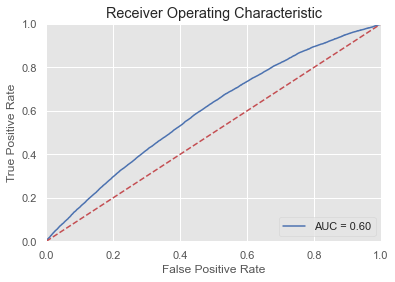

In [28]:
from sklearn.metrics import roc_curve, auc

probs               = nbModel2.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
print('Accuracy before tuning :',accuracy_score(y_test,nbModelpred))
print()
print('Accuracy after tuning :',accuracy_score(y_test,nbModelpred2))

Accuracy before tuning : 0.5578265601359064

Accuracy after tuning : 0.5708066785230802
